### Student: Nelson Alejandro Castro Andrews
<h1 align='center'>
 ARCHIVO DE REPORTE
</h1>

<h1 align='center'>
 <b>PROYECTO INDIVIDUAL Nº3</b>
</h1>

<h1 align='center'>
 <b> Data Analyst <b>
</h1>

🧾 1.1. Conociendo del negocio:
Los MOOCs (cursos masivos abiertos y online, por sus siglas en inglés) han revolucionado el mundo de la educación desde principios de la década pasada, cuando el profesor Sebastian Thrun comenzó con la transmisión online de su curso introductorio a la Inteligencia Artificial. Poco tiempo después, Thrun fundó Udacity y con el pasar de los años se han ido sumando otras plataformas como edX y Coursera, brindando servicios similares: acceso a contenido específico, de calidad y de manera práctica, desde la comodidad del hogar. Muchas de estas plataformas tienen contenido gratuito mientras que el modelo de negocio en general se basa ya sea en el pago de suscripciones recurrentes para acceso general o únicas, para acceder a certificaciones o a cursos premium.
Con el aumento de la popularidad de los MOOCs, no solo han aparecido nuevas plataformas privadas como las mencionadas anteriormente, sino que también muchas universidades y organizaciones sin fines de lucro han sumado a la oferta haciendo el mercado mucho más competitivo. En este contexto, resulta imperante para cada plataforma, ajustar sus modelos de negocio, los cursos y el contenido que se ofrece en los mismos para lograr captar y retener a la mayor cantidad de clientes.
Acerca de Coursera; Coursera Inc. es un proveedor masivo de cursos abiertos en línea con sede en Estados Unidos fundado en 2012 por los profesores de ciencias de la computación de la Universidad de Stanford Andrew Ng y Daphne Koller. Coursera trabaja con universidades y otras organizaciones para ofrecer cursos, certificaciones y títulos en línea en una variedad de temas.

Precio de las acciones: COUR (NYSE) $15.51 +0.02 (+0.13%) - 20 de mayo, 10:12 AM EDT
Fundado: 2012
Sede: California, Estados Unidos
Usuarios: 92 millones (2021)
Empleados: 1,138 (diciembre 2021)
Disponible en: Multilingüe (40)
Fundadores: Andrew Ng, Daphne KollerCon 
Con este análisis es posible evaluar qué cursos/temáticas son más rentables, lo cual contempla no solo cantidad, sino tambien precio.

🧾 1.2. EDA
El análisis exploratorio de datos se refiere al proceso crítico de realizar investigaciones iniciales sobre datos para descubrir patrones, detectar anomalías, probar hipótesis y verificar suposiciones con la ayuda de estadísticas resumidas y representaciones gráficas.

🧾 2. Exploración de conjuntos de datos
Resumen de datos
El conjunto de datos del curso se eliminó del sitio web de Coursera. Este conjunto de datos contiene principalmente 6 columnas y 890 datos del curso. La descripción detallada:

course_title : Contiene el título del curso.
course_organization : Indica qué organización está llevando a cabo los cursos.
courseCertificatetype : Tiene detalles sobre cuáles son las diferentes certificaciones disponibles en los cursos.
course_rating : Tiene las calificaciones asociadas a cada curso.
course_difficulty : Habla sobre qué tan difícil o cuál es el nivel del curso.
coursestudentsenrolled : Tiene el número de alumnos que están matriculados en el curso.

Importamos librerias

In [44]:
# Importar las librerias necesarias
import sys
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from scipy import stats
import requests as rts
import fastparquet as fpt
import pyarrow as pw
import seaborn as sns
pd.set_option("display.max_columns", 40)
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from geopy.geocoders import Nominatim 
from geopy.extra.rate_limiter import RateLimiter

Paso #2: import ***warnings***

In [45]:
# Warnings
import warnings

def disable_pandas_warnings():
    warnings.resetwarnings()  # Maybe somebody else is messing with the warnings system?
    warnings.filterwarnings('ignore')  # Ignore everything
    # ignore everything does not work: ignore specific messages, using regex
    warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
    warnings.filterwarnings('ignore', '.*indexing past lexsort depth may impact performance*')
disable_pandas_warnings()

### Carga de datos y revisión básica

### Ingesto los archivos CSV con los datos a utilizar en Pandas.

In [46]:
#Ingestar archivo Coursera_courses.csv y verificar estructura.
df_1 = pd.read_csv('Coursera_courses.csv')
df_1

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training
...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution


## Verificamos estructura del primer Dataframe

In [160]:
df_1= pd.read_csv('Coursera_courses.csv')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [48]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import cufflinks as cf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Nos piden Segmentar el nivel de ventas según ***precio***, ***idioma***, ***nivel*** y ***rating*** de cada curso para analizar qué tanto ***influyen dichas variables en la demanda del producto.*** vendido. pero al verificar la estructura del primer archivo (Coursera_courses.csv) nos damos cuenta que no tiene las columnas ***precio***, ***idioma***, ***nivel*** y ***rating***las cuales son claves para nuestro analisis descriptivo.

## Ingestamos el segundo archivo provisto en el datasets

In [49]:
#Ingestar archivo Coursera_reviews.csv y verificar estructura.
df_2 = pd.read_csv('Coursera_reviews.csv')
df_2

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


## Verificamos estructura del segundo Dataframe

In [50]:
df_2 = pd.read_csv('Coursera_reviews.csv')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


Igualmente se nos pide Segmentar el nivel de ventas según ***precio***, ***idioma***, ***nivel*** y ***rating*** de cada curso para analizar qué tanto ***influyen dichas variables en la demanda del producto.*** vendido. pero al verificar la estructura del segundo archivo (Coursera_reviews.csv) nos damos cuenta que solo tiene la columna ***rating***.

## ----Segunda--mirada--identificando--variables--y/o--características-----(es decir las columnas)

Para Segmentar nivel de ventas según ***precio***, ***idioma***, ***nivel*** y ***rating*** de cada curso para analizar qué tanto ***influyen dichas variables en la demanda del producto.*** vendido. verificamos y en la estructura del cuarto archivo (udemy_courses.csv) nos damos cuenta que si tiene las columnas ***precio*** y ***nivel***, faltando ***idioma*** y ***rating.***

Aplicando el EDA comprobamos los datos antes de hacer cualquier suposición. lo que me Permite identificar errores obvios, así como comprender mejor los patrones en los datos, gracias a ello trabajare este analisis con el Dataframe numero df_2, df_3 y df_4 como tambien con datos de la web y no incluire el primer Dataframe por la razon obvia de no tener los datos que requiero. Procedere a revisar valores atípicos o sucesos anómalos inmediatamente.

## Procedere a revisar valores atípicos o sucesos anómalos en el **Dataframe #2** (df_2)

In [51]:
df_2 = pd.read_csv('Coursera_reviews.csv')
df_2

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


## Pandas elimina filas sólo con valores NaN para una columna en particular usando el método DataFrame.dropna()

In [52]:
df_2 = df_2.dropna(subset=["rating"])
print("DataFrame after removing rows with NaN value in rating Column:")
print(df_2)

DataFrame after removing rows with NaN value in rating Column:
                                                   reviews        reviewers  \
0        Pretty dry, but I was able to pass with just t...      By Robert S   
1        would be a better experience if the video and ...   By Gabriel E R   
2        Information was perfect! The program itself wa...       By Jacob D   
3        A few grammatical mistakes on test made me do ...        By Dale B   
4        Excellent course and the training provided was...        By Sean G   
...                                                    ...              ...   
1454706                                                  g     By Brijesh K   
1454707                                                  .    By Vasavi V M   
1454708                                                  .     By Drishti D   
1454709                                                  .  By FAUSTINE F K   
1454710                                                  G        By

In [53]:
df_2.head(2)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training


In [54]:
#describe y shape
df_2.describe()

,rating
count,1.454711e+06
mean,4.696649e+00
std,6.983271e-01
min,1.000000e+00
25%,5.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [56]:
# Ahora obtenemos información básica sobre el DataFrame
df_2.columns

Index(['reviews', 'reviewers', 'date_reviews', 'rating', 'course_id'], dtype='object')

In [57]:
df_2.rating.value_counts()

5    1146164
4     226702
3      48303
1      17354
2      16188
Name: rating, dtype: int64

### Grafico ingestando los datos del contenido de la columna rating.

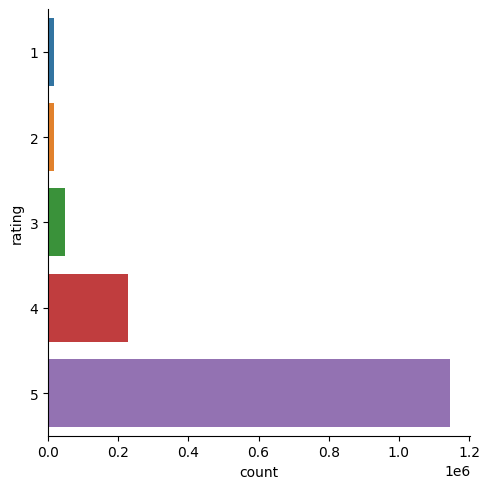

In [58]:
sns.catplot(y = "rating", data = df_2, kind = "count")

In [59]:
### count, min, max, mean, median, std y corr
df_2.corr()

,rating
rating,1.0


In [60]:
nulos= df_2['course_id'].isnull().sum()
total= len(df_2['course_id'])
porcentaje= ((nulos/ total)*100)
print('El porcentaje de nulos en la columna course_id', porcentaje)

El porcentaje de nulos en la columna course_id 0.0


In [61]:
nulos= df_2['rating'].isnull().sum()
total= len(df_2['rating'])
porcentaje= ((nulos/ total)*100)
print('El porcentaje de nulos en la columna rating', porcentaje)

El porcentaje de nulos en la columna rating 0.0


In [62]:
regex = re.compile(r'[^0-9]') # Eliminamos todo lo que no sean números
df_2['rating'] = df_2['rating'].replace(regex, '').astype(int)

In [63]:
#Se eliminan las columnas mencionadas
df_2.drop(['date_reviews','reviewers', "reviews"], axis= 1,  inplace=True)
df_2.shape

(1454711, 2)

In [64]:
df_2.columns
df_2.head()
df_2.tail()

,rating,course_id
1454706,5,computer-networking
1454707,5,computer-networking
1454708,5,computer-networking
1454709,5,computer-networking
1454710,5,computer-networking


## Ingestamos el tercer archivo provisto en el datasets

In [65]:
# Ingestar archivo edx_courses.csv y verificar estructura.
df_3 = pd.read_csv('edx_courses.csv')
df_3.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


## Verificamos estructura del tercer Dataframe

In [66]:
datos = pd.read_csv('edx_courses.csv')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Para Segmentar el nivel de ventas según ***precio***, ***idioma***, ***nivel*** y ***rating*** de cada curso para analizar qué tanto ***influyen dichas variables en la demanda del producto.*** vendido. verificamos y en la estructura del tercer archivo (edx_courses.csv) nos damos cuenta que si tiene las columnas ***precio***, ***idioma***, y ***nivel***, faltando solo el ***rating.***

## Procedere a revisar valores atípicos o sucesos anómalos en el **Dataframe #3** (df_3)

In [67]:
df_3 = pd.read_csv('edx_courses.csv')
df_3

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https:

In [68]:
# Ahora obtenemos información básica sobre el DataFrame
df_3.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

In [69]:
df_3.rename(columns={'Level':'nivel', 'language':'idioma'}, inplace= True)

In [70]:
df_3.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,nivel,subject,idioma,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...


# Eliminamos todo lo que no sea numeros

In [71]:
regex = re.compile(r'[^0-9]') # Eliminamos todo lo que no sean números
df_3['price'] = df_3['price'].replace(regex, '').astype(int)

# Graficando la columna ***price***

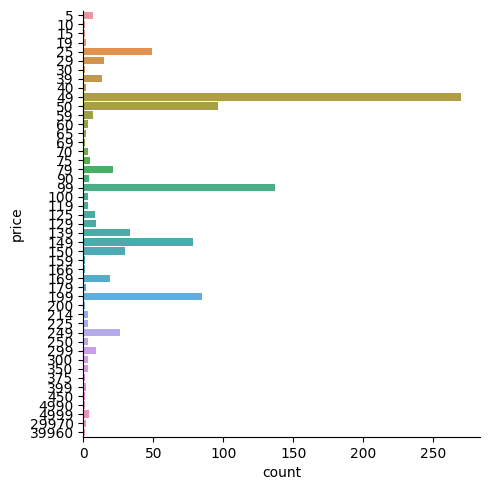

In [72]:
sns.catplot(y = "price", data = df_3, kind = "count")

# Correlaciones

In [73]:
### count, min, max, mean, median, std y corr
df_3.corr()

,price
price,1.0


# + Detalles del dataframe df_3

In [74]:
df_3.columns
df_3.head()
df_3.tail()

,title,summary,n_enrolled,course_type,institution,instructors,nivel,subject,idioma,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,25,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,139,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,139,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,25,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https://www.edx.org/course/cities-and-the-chal...
974,MathTrackX: Special Functions,"Understand trigonometric, exponential and loga...",NaN,Self-paced on your time,University of Adelaide,Dr David Butler,Introductory,Math,English,English,3–6 hours per week,4 Weeks,79,This course is part two of the MathTrackX XSer...,NaN,https://www.edx.org/course/mathtrackx-special-...


# Comprobando valores nulos

In [75]:
nulos= df_3['price'].isnull().sum()
total= len(df_3['price'])
porcentaje= ((nulos/ total)*100)
print('El porcentaje de nulos en la columna price', porcentaje)

El porcentaje de nulos en la columna price 0.0


In [76]:
nulos= df_3['idioma'].isnull().sum()
total= len(df_3['idioma'])
porcentaje= ((nulos/ total)*100)
print('El porcentaje de nulos en la columna idioma', porcentaje)

El porcentaje de nulos en la columna idioma 0.0


In [77]:
nulos= df_3['nivel'].isnull().sum()
total= len(df_3['nivel'])
porcentaje= ((nulos/ total)*100)
print('El porcentaje de nulos en la columna nivel', porcentaje)

El porcentaje de nulos en la columna nivel 0.0


### Eliminando columnas innecesarias

In [78]:
#Se eliminan las columnas mencionadas
df_3.drop(['n_enrolled', 'course_type', 'instructors', 'subject', 'subtitles', 'course_effort', 'course_description', 'course_syllabus', 'course_length', 'course_url'], axis=1, inplace= True)

### Verificando estado del dataframe despues de elimiminar columnas

In [79]:
df_3.head()

,title,summary,institution,nivel,idioma,price
0,How to Learn Online,Learn essential strategies for successful onli...,edX,Introductory,English,49
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",The University of Michigan,Introductory,English,49
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,Harvard University,Introductory,English,90
3,The Analytics Edge,"Through inspiring examples and stories, discov...",Massachusetts Institute of Technology,Intermediate,English,199
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"University of California, Berkeley",Introductory,English,249


## Ordenando Por precio decreciente para evidenciar valores extremos y proceder a sustitucion o eliminación (lo que sea mas viable)

In [80]:
df_3.sort_values(by='price', ascending=False).head(20)

,title,summary,institution,nivel,idioma,price
543,Information Technology Foundations,Information Technology Foundations examines IT...,Western Governors University,Introductory,English,39960
514,Network and Security Foundations,This course introduces the components of a com...,Western Governors University,Introductory,English,29970
962,Scripting and Programming Foundations,This course is an introduction to programming ...,Western Governors University,Introductory,English,29970
848,Introducción a Ciencias de Datos y Estadística...,En este curso adquirirás los métodos estadísti...,Tecnológico de Monterrey,Advanced,Español,4999
669,Introducción a Matemáticas para Finanzas y Neg...,El objetivo del curso es entender como ciertos...,Tecnológico de Monterrey,Advanced,Español,4999
707,Indian & Tibetan River of Buddhism,Explore an overview of the history and philoso...,Columbia University,Intermediate,English,4999
433,Información financiera y su análisis,Aplica fundamentos contables y financieros par...,Tecnológico de Monterrey,Advanced,Español,4999
797,Introducción a la factura electrónica,Conoce los beneficios de la facturación electr...,LOGYCA,Intermediate,Español,4990
157,Foundations of Modern Finance I,A mathematically rigorous framework to underst...,Massachusetts Institute of Technology,Advanced,English,450
842,Driving Digital Innovation through Experimenta...,Learn how to apply principles of experimentati...,Boston University,Advanced,English,399


Podemos utilizar el método isalnum() para comprobar si un carácter o cadena dada es alfanumérico o no. Podemos comparar cada carácter individualmente de una cadena, y si es alfanumérico, lo combinamos usando la función join().

# Aislando solo la columna precio para observar al detalle precio de los cursos y los precios mas apreciados por los clientes / tambien se observan algunos valores extremos.

In [81]:
df_3.price.value_counts()

49       270
99       137
50        96
199       85
149       78
25        49
139       33
150       30
249       26
79        21
169       19
29        15
39        13
299        9
129        9
125        8
5          7
59         7
75         5
4999       4
90         4
119        3
214        3
250        3
60         3
350        3
70         3
300        3
225        3
100        3
19         2
65         2
40         2
29970      2
179        2
399        2
39960      1
4990       1
166        1
375        1
159        1
450        1
69         1
10         1
200        1
15         1
30         1
Name: price, dtype: int64

In [82]:
df_3.sort_values(by='price', ascending=False).head(20)

,title,summary,institution,nivel,idioma,price
543,Information Technology Foundations,Information Technology Foundations examines IT...,Western Governors University,Introductory,English,39960
514,Network and Security Foundations,This course introduces the components of a com...,Western Governors University,Introductory,English,29970
962,Scripting and Programming Foundations,This course is an introduction to programming ...,Western Governors University,Introductory,English,29970
848,Introducción a Ciencias de Datos y Estadística...,En este curso adquirirás los métodos estadísti...,Tecnológico de Monterrey,Advanced,Español,4999
669,Introducción a Matemáticas para Finanzas y Neg...,El objetivo del curso es entender como ciertos...,Tecnológico de Monterrey,Advanced,Español,4999
707,Indian & Tibetan River of Buddhism,Explore an overview of the history and philoso...,Columbia University,Intermediate,English,4999
433,Información financiera y su análisis,Aplica fundamentos contables y financieros par...,Tecnológico de Monterrey,Advanced,Español,4999
797,Introducción a la factura electrónica,Conoce los beneficios de la facturación electr...,LOGYCA,Intermediate,Español,4990
157,Foundations of Modern Finance I,A mathematically rigorous framework to underst...,Massachusetts Institute of Technology,Advanced,English,450
842,Driving Digital Innovation through Experimenta...,Learn how to apply principles of experimentati...,Boston University,Advanced,English,399


# Eliminando valores extremos y atipico de la columna precio en df_3

In [83]:
df_3.replace(({4999: 0, 5: 0, 4990: 0, 39960: 0, 29970: 0, 10: 0}),inplace=True)

# Graficando luego de Eliminar valores atipicos en los precios de los cursos

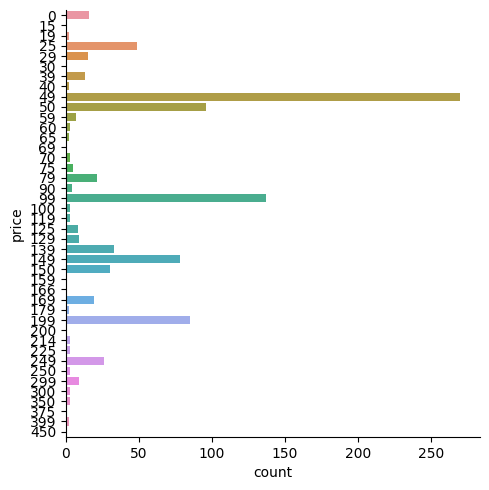

In [84]:
sns.catplot(y = "price", data = df_3, kind = "count")

In [85]:
df_3.head()

,title,summary,institution,nivel,idioma,price
0,How to Learn Online,Learn essential strategies for successful onli...,edX,Introductory,English,49
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",The University of Michigan,Introductory,English,49
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,Harvard University,Introductory,English,90
3,The Analytics Edge,"Through inspiring examples and stories, discov...",Massachusetts Institute of Technology,Intermediate,English,199
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"University of California, Berkeley",Introductory,English,249


# contamos los valores faltantes reales


In [86]:
# Como NO notamos que algunas columnas tienen '?' imputado donde falta un valor, contamos los valores faltantes reales
for x in df_3:
    res = False
    cnt = 0
    for y in df_3[x]:
        if y == '?':
            res = True
            cnt += 1
    print(f"{x} contains '?': {res} ({cnt})")

title contains '?': False (0)
summary contains '?': False (0)
institution contains '?': False (0)
nivel contains '?': False (0)
idioma contains '?': False (0)
price contains '?': False (0)


# Sacamos la Media de la columna price

In [87]:
means=df_3.mean()
print("Media de la columna price:")
print(means)

Media de la columna price:
price    99.138462
dtype: float64


# Analizamos la Columna idioma

Podemos utilizar el método isalnum() para comprobar si un carácter o cadena dada es alfanumérico o no. Podemos comparar cada carácter individualmente de una cadena, y si es alfanumérico, lo combinamos usando la función join().

In [88]:
string_value = df_3.idioma
s = ''.join(ch for ch in string_value if ch.isalnum())
print(s)

EnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEspañolEnglishEnglishEnglishEnglishEspañolEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishItalianoEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEspañolEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEspañolEnglishEnglishEnglishEnglishEnglishEnglishEspañolEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEspañolEnglishEnglishEnglishEnglishEspañolEnglishEspañolEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEnglishEspañolEnglishEngli

In [89]:
df_3.idioma.value_counts()

English          777
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: idioma, dtype: int64

# OBSERVAMOS DOS TENDENCIAS SIGNIFICATIVAS EN LA COLUMNA IDIOMA Y PROCEDEMOS A GRAFICAR

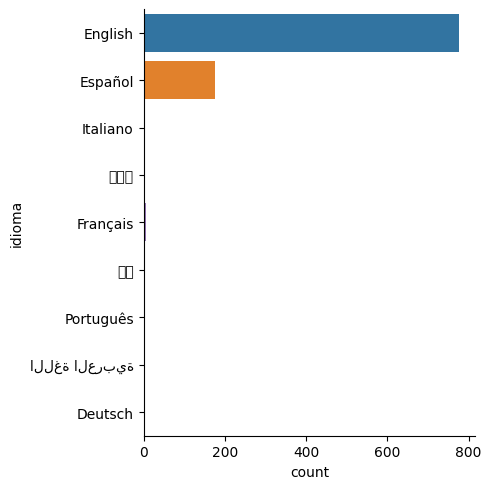

In [90]:
sns.catplot(y = "idioma", data = df_3, kind = "count")

# Analizamos la columna ***nivel***

Podemos utilizar el método isalnum() para comprobar si un carácter o cadena dada es alfanumérico o no. Podemos comparar cada carácter individualmente de una cadena, y si es alfanumérico, lo combinamos usando la función join().

In [91]:
string_value = df_3.nivel
s = ''.join(ch for ch in string_value if ch.isalnum())
print(s)

IntroductoryIntroductoryIntroductoryIntermediateIntroductoryIntroductoryIntermediateIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntermediateIntroductoryIntroductoryIntroductoryIntroductoryAdvancedIntroductoryIntermediateIntroductoryIntermediateIntermediateIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntermediateIntermediateIntroductoryIntroductoryIntroductoryIntroductoryIntermediateIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntermediateIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntermediateIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntermediateIntermediateIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntermediateIntroductoryIntermediateIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroductoryIntroduc

In [92]:
df_3.nivel.value_counts()

Introductory    621
Intermediate    267
Advanced         87
Name: nivel, dtype: int64

## Graficamos la Columna ***nivel***

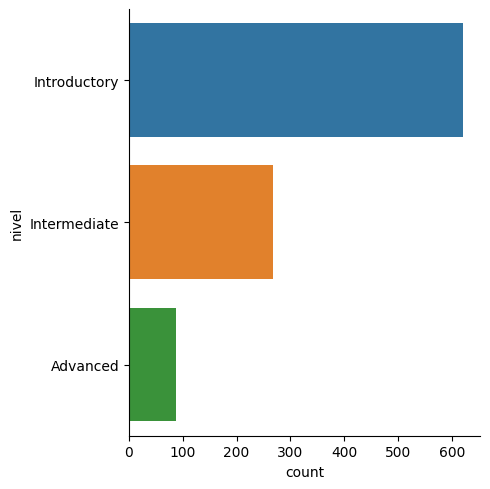

In [93]:
sns.catplot(y = "nivel", data = df_3, kind = "count")

# `Colocamos Los campos de texto en df_3 en minúsculas, sin excepciones aplicando metodo str.lower()`

In [94]:
# df_3
df_3['title'] = df_3['title'].str.lower()
df_3['summary'] = df_3['summary'].str.lower()
df_3['title'] = df_3['title'].str.lower()
df_3['institution'] = df_3['institution'].str.lower()
df_3['nivel'] = df_3['nivel'].str.lower()
df_3['idioma'] = df_3['idioma'].str.lower()

In [95]:
df_3.head()

,title,summary,institution,nivel,idioma,price
0,how to learn online,learn essential strategies for successful onli...,edx,introductory,english,49
1,programming for everybody (getting started wit...,"this course is a ""no prerequisite"" introductio...",the university of michigan,introductory,english,49
2,cs50's introduction to computer science,an introduction to the intellectual enterprise...,harvard university,introductory,english,90
3,the analytics edge,"through inspiring examples and stories, discov...",massachusetts institute of technology,intermediate,english,199
4,marketing analytics: marketing measurement str...,this course is part of a micromasters® program,"university of california, berkeley",introductory,english,249


## Ingestamos el cuarto archivo provisto en el datasets

In [96]:
# Ingestar archivo udemy_courses.csv y verificar estructura.
df_4 = pd.read_csv('udemy_courses.csv')
df_4

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


## Verificamos estructura del cuarto Dataframe

In [97]:
datos = pd.read_csv('udemy_courses.csv')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


## Procedere a revisar valores atípicos o sucesos anómalos en el **Dataframe #4** (df_4)

In [98]:
df_4.describe

<bound method NDFrame.describe of       course_id                                       course_title  \
0       1070968                 Ultimate Investment Banking Course   
1       1113822  Complete GST Course & Certification - Grow You...   
2       1006314  Financial Modeling for Business Analysts and C...   
3       1210588  Beginner to Pro - Financial Analysis in Excel ...   
4       1011058       How To Maximize Your Profits Trading Options   
...         ...                                                ...   
3673     775618  Learn jQuery from Scratch - Master of JavaScri...   
3674    1088178  How To Design A WordPress Website With No Codi...   
3675     635248                      Learn and Build using Polymer   
3676     905096  CSS Animations: Create Amazing Effects on Your...   
3677     297602  Using MODX CMS to Build Websites: A Beginner's...   

                                                    url  is_paid  price  \
0     https://www.udemy.com/ultimate-investment-ba

In [99]:
df_4.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [100]:
# Ahora obtenemos información básica sobre el DataFrame
df_4.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

# Eliminamos algunas columnas

In [101]:
# Se eliminan las columnas mencionadas
df_4.drop(['course_id', 'url', 'is_paid', 'num_reviews', 'num_lectures', 'content_duration', 'published_timestamp', 'subject'], axis=1, inplace= True)

In [104]:
df_4.head()

,course_title,price,num_subscribers,level
0,Ultimate Investment Banking Course,200,2147,All Levels
1,Complete GST Course & Certification - Grow You...,75,2792,All Levels
2,Financial Modeling for Business Analysts and C...,45,2174,Intermediate Level
3,Beginner to Pro - Financial Analysis in Excel ...,95,2451,All Levels
4,How To Maximize Your Profits Trading Options,200,1276,Intermediate Level


In [105]:
# Como NO notamos que algunas columnas tienen '?' imputado donde falta un valor, contamos los valores faltantes reales
for x in df_4:
    res = False
    cnt = 0
    for y in df_4[x]:
        if y == '?':
            res = True
            cnt += 1
    print(f"{x} contains '?': {res} ({cnt})")

course_title contains '?': False (0)
price contains '?': False (0)
num_subscribers contains '?': False (0)
level contains '?': False (0)


# Graficamos Columna Precio para su analisis

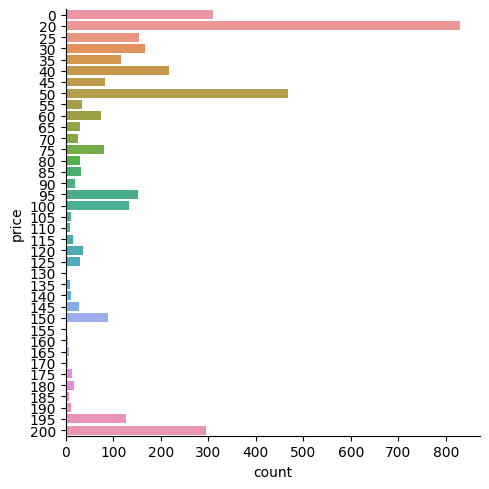

In [106]:
sns.catplot(y = "price", data = df_4, kind = "count")

# Graficamos Columna nivel para su analisis

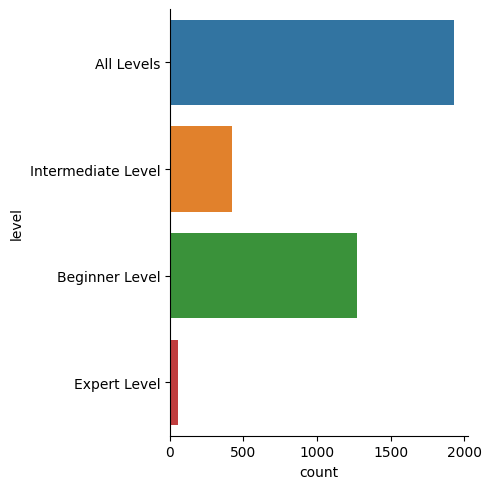

In [107]:
# Graficamos Columna nivel para su analisis
sns.catplot(y = "level", data = df_4, kind = "count")

# Analizamos una columna que podria darnos una buena informacion

In [108]:
regex = re.compile(r'[^0-9]') # Eliminamos todo lo que no sean números
df_4['num_subscribers'] = df_4['num_subscribers'].replace(regex, '').astype(int)

In [109]:
df_4.num_subscribers.value_counts()

0       70
1       49
5       28
2       27
3       26
        ..
4449     1
6039     1
1522     1
96       1
901      1
Name: num_subscribers, Length: 2197, dtype: int64

# Graficamos la Columna Inscritos (num_subscribers)

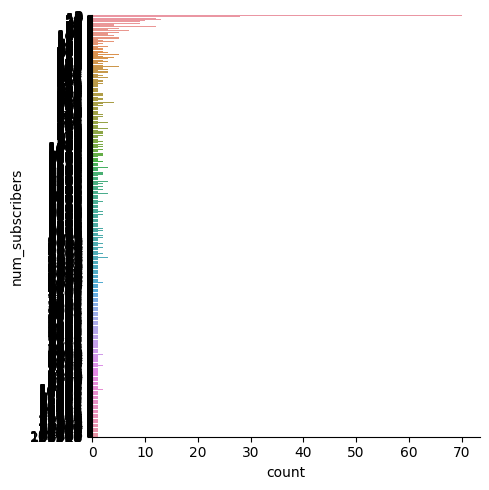

In [110]:
sns.catplot(y = "num_subscribers", data = df_4, kind = "count")

# Como vemos no podemos incluirla en el analisis porque esta bastante fraccionada y los valores son bastante atipicos.

# ***Cruce de datos con datasets complementario.***


In [111]:
df=pd.read_csv("Coursea_data.csv")

In [112]:
df=df.drop("Unnamed: 0",axis=1)

Entonces, 1 objeto numero solamente. Pero, podemos convertir algunos otros a numericos también.

In [113]:
df.describe(include=['object']).T

,count,unique,top,freq
course_title,891,888,Developing Your Musicianship,2
course_organization,891,154,University of Pennsylvania,59
course_Certificate_type,891,3,COURSE,582
course_difficulty,891,4,Beginner,487
course_students_enrolled,891,205,120k,22


La calificación media del curso es 4.677329. Bastante alto, ya que la calificación se puede dar de 0 a 5. El mínimo es 3.3, el más alto es 5, lo demuestra.

4.2 Plan inicial para la exploración de datos
Exploración de datos

Trazar course_rating para obtener una visión general de la distribución.
analizar los valores de los tipos de certificados del curso.
Limpieza de datos

Eliminación de la primera columna sin nombre
Eliminar el nombre del curso: no es necesario ahora; ya que todos los valores son únicos

📉 5. Data Exploration
5.1. Basic Rating distribution :

Text(0.5, 1.0, '\nDistribución de calificaciones del curso\n')

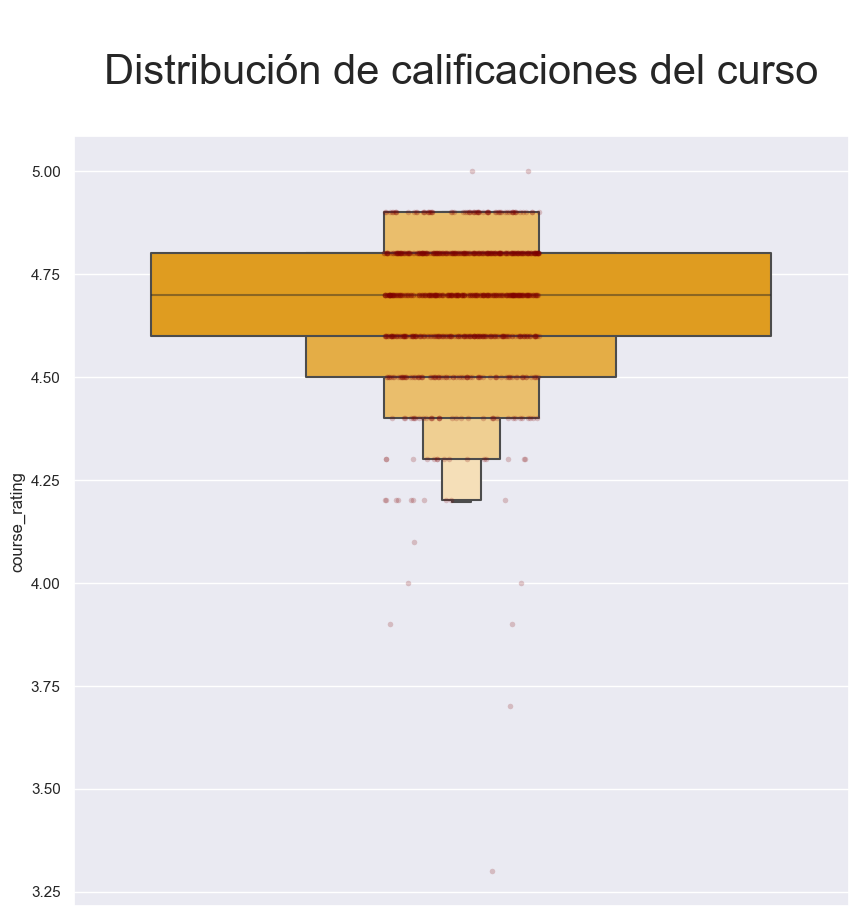

In [114]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.boxenplot( y="course_rating", data=df,
                   showfliers=False,color='orange')
ax = sns.stripplot( y="course_rating", data=df,
                   size=4, color="maroon",alpha=0.2)
ax.axes.set_title("\nDistribución de calificaciones del curso\n",fontsize=30)

Trazar course_rating para obtener una visión general de la distribución.

Text(0.5, 1.0, '\nDistribución de calificaciones del curso\n')

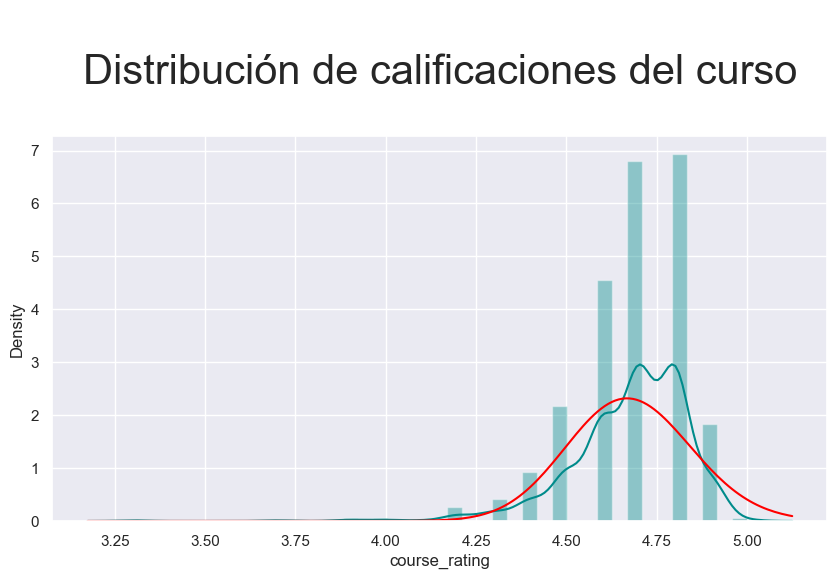

In [115]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(df['course_rating'],color='darkcyan',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\nDistribución de calificaciones del curso\n",fontsize=30)

Resultados:
La calificación promedio del curso es bastante más alta, en comparación con el valor más bajo y máximo.

Distribución de la calificación por dificultad del curso:

5.2. Frecuencia basada en la dificultad.

Text(0.5, 1.0, '\nFrecuencia basada en la dificultad.\n')

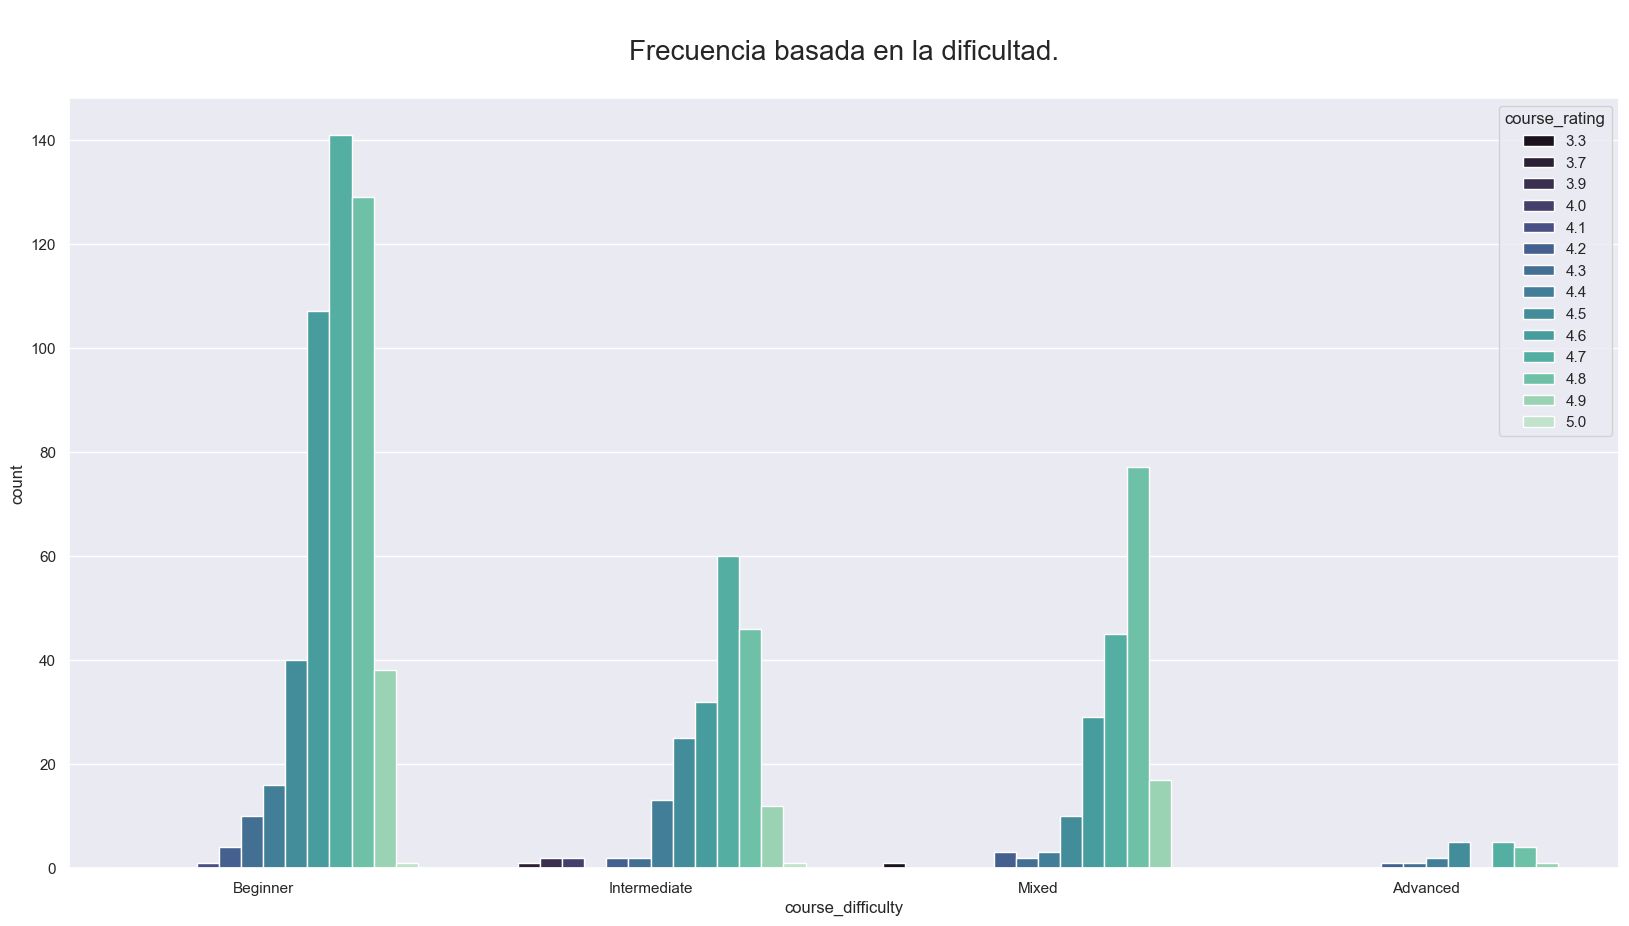

In [116]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="course_rating", x="course_difficulty", data=df,palette="mako")
ax.axes.set_title("\nFrecuencia basada en la dificultad.\n",fontsize=20)

Visión:
La calificación de los cursos avanzados tiene algunos altibajos; tal vez debido a la baja frecuencia.
El curso para principiantes tiene una distribución bastante similar a la tabla de calificación total.
La calificación máxima del curso intermedio no es tan aguda como la de otros, eso puede decir: como los participantes tienen algún conocimiento sobre el tema, pueden juzgar mejor y ser críticos.

5.3. Distribución de la calificación por tipo de curso:

Text(0.5, 1.0, '\nDistribución de la calificación por tipo de curso:\n')

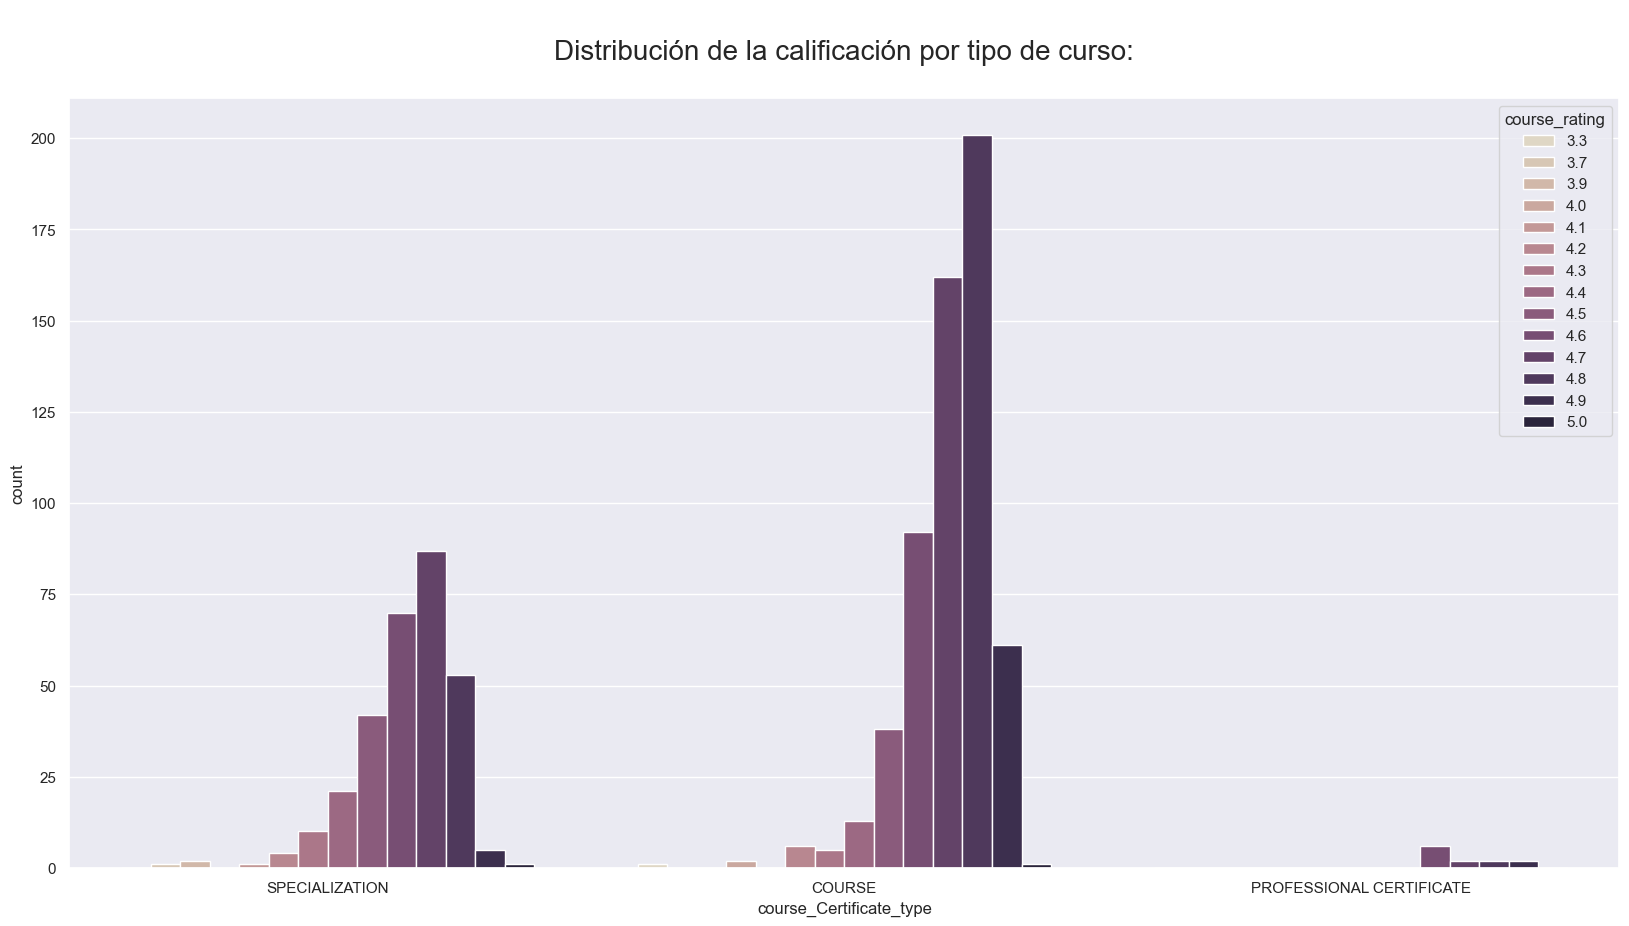

In [117]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="course_rating", x="course_Certificate_type", data=df,palette="ch:s=-.2,r=.6")
ax.axes.set_title("\nDistribución de la calificación por tipo de curso:\n",fontsize=20)

Hallazgos y perspectivas:
Las especializaciones tienen un valor medio más bajo que los cursos, pero la distribución es interesante. La especialización tiene buenos valores de distribución a la derecha, pero los cursos normales están a la izquierda.

5.4. Distribución de la calificación por tipo de curso: Combinado

Text(0.5, 1.0, '\nDistribución de la calificación por tipo de curso: Combinado : Combined\n')

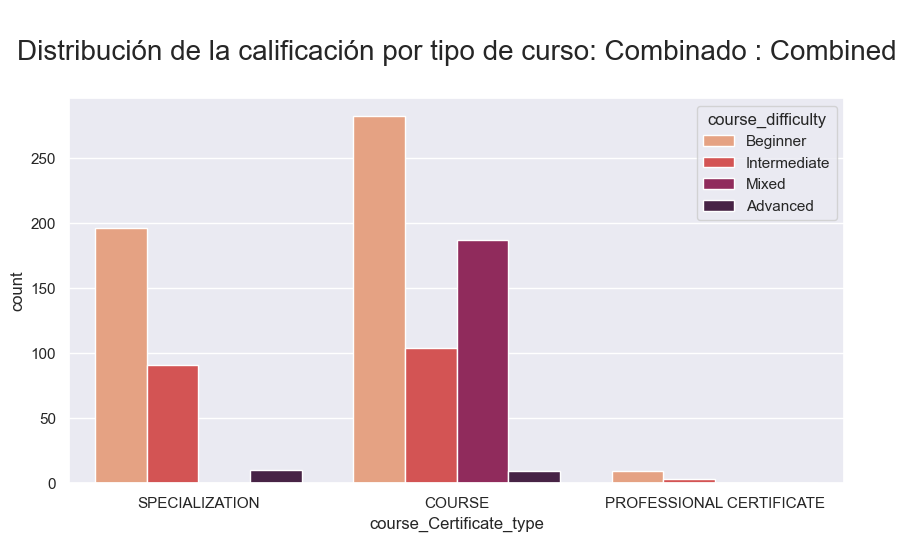

In [118]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(hue="course_difficulty", x="course_Certificate_type", data=df,palette="rocket_r")
ax.axes.set_title("\nDistribución de la calificación por tipo de curso: Combinado : Combined\n",fontsize=20)

Resultados:
Mixto - El curso tiene una distribución inestable, otros tienen una distribución normal.

Text(0.5, 1.0, '\nDistribución de la calificación por tipo de curso \n')

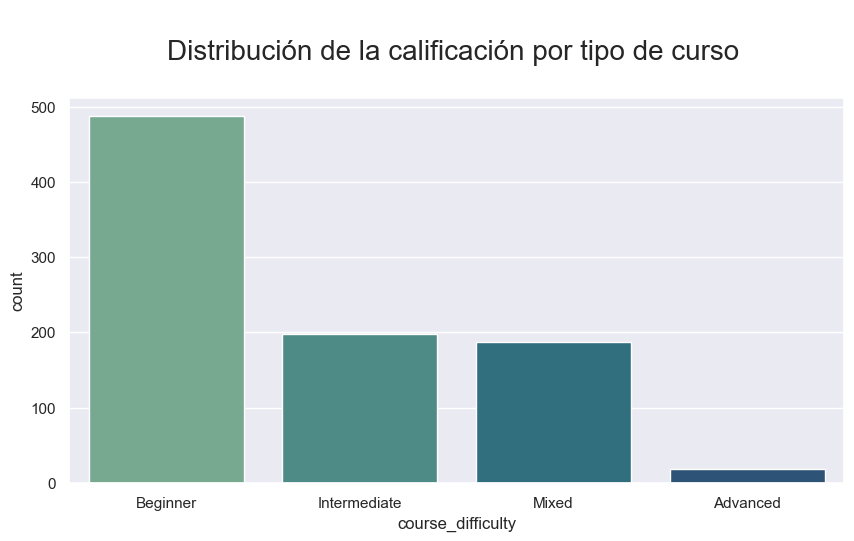

In [119]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot( x="course_difficulty", data=df,palette="crest")
ax.axes.set_title("\nDistribución de la calificación por tipo de curso \n",fontsize=20)

Text(0.5, 1.0, '\nDistribution per course type \n')

Text(0.5, 1.0, '\nDistribución de la calificación por tipo de curso : Combined\n')

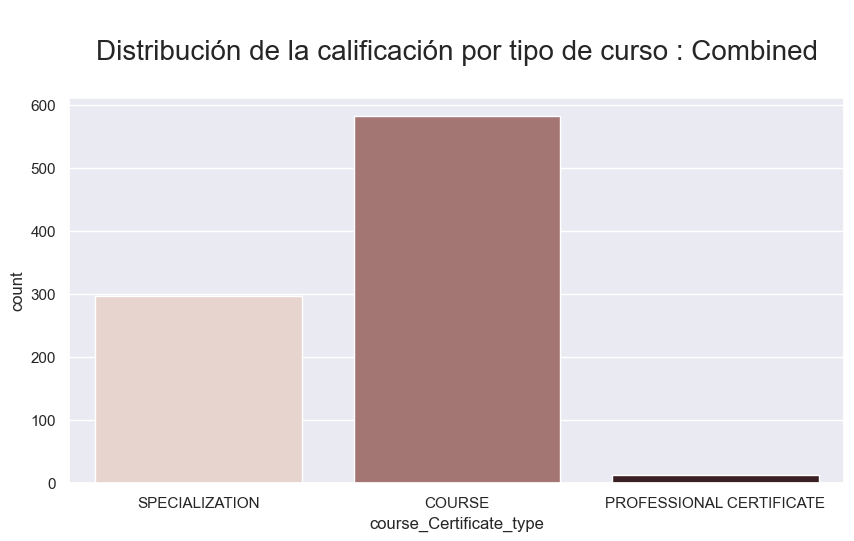

In [120]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot( x="course_Certificate_type", data=df,palette="ch:s=.8,r=.1")
ax.axes.set_title("\nDistribución de la calificación por tipo de curso : Combined\n",fontsize=20)

Resultados:
El curso cuenta:

Principiante > Intermidiate > Avanzado. No hay suficientes datos para cursos avanzados.
Cursos > Especialización > Certificado Profesional. No hay suficientes datos para los certificados profesionales.

📄 6. Disputa de datos
Limpieza de datos

Eliminación de la primera columna sin nombre

Eliminar el nombre del curso: no es necesario ahora; ya que todos los valores son únicos

Otros se harán según sea necesario.

⌛️ 7. Ingeniería de características

7.1. Modificación de course_students_enrolled columna

In [121]:
df_fe1=df.copy()

In [122]:
def course_students_enrolled_modifier(x):
    return x[:-2]

In [123]:
df_fe1['course_students_enrolled_modified']=df_fe1['course_students_enrolled'].apply(course_students_enrolled_modifier)
df_fe1['course_students_enrolled_modified']=df_fe1['course_students_enrolled_modified'].apply(pd.to_numeric)
df_fe1 =df_fe1.drop(['course_students_enrolled'],axis=1)
df_fe1

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled_modified
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,1.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,13.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,9.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,32.0
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,5.0
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,2.0
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,3.0
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.0


7.2. Modificación de course_difficulty columna a numarical

In [124]:
def course_difficulty_modifier(x):
    if x=="Beginner":
        return "0"
    elif x=="Intermediate":
        return "1"
    elif x=="Mixed":
        return "0.5"
    elif x=="Advanced":
        return "2"
    else:
        return "0" 
"""Como la mayoría de los cursos son de nivel principiante, asumimos que Undefined también será principiante.."""

'Como la mayoría de los cursos son de nivel principiante, asumimos que Undefined también será principiante..'

In [125]:
df_fe1['course_difficulty_modified']=df_fe1['course_difficulty'].apply(course_difficulty_modifier)
df_fe1['course_difficulty_modified']=df_fe1['course_difficulty_modified'].apply(pd.to_numeric)
df_fe1 =df_fe1.drop(['course_difficulty'],axis=1)
df_fe1

,course_title,course_organization,course_Certificate_type,course_rating,course_students_enrolled_modified,course_difficulty_modified
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,5.0,0.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,1.0,1.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,13.0,0.5
3,A Law Student's Toolkit,Yale University,COURSE,4.7,9.0,0.5
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,32.0,0.5
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,5.0,1.0
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,2.0,0.5
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,3.0,1.0
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,9.0,1.0


# Mas + EDA

In [126]:
df_fe1[['course_difficulty_modified','course_students_enrolled_modified']].describe()

,course_difficulty_modified,course_students_enrolled_modified
count,891.000000,881.000000
mean,0.369809,8.511918
std,0.472738,10.731756
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,5.000000
75%,0.500000,9.000000
max,2.000000,83.000000


course_students_enrolled_modified has some empty columns, so we have to fill them.

Text(0.5, 1.0, '\nDistribución de Alumnos matriculados del curso\n')

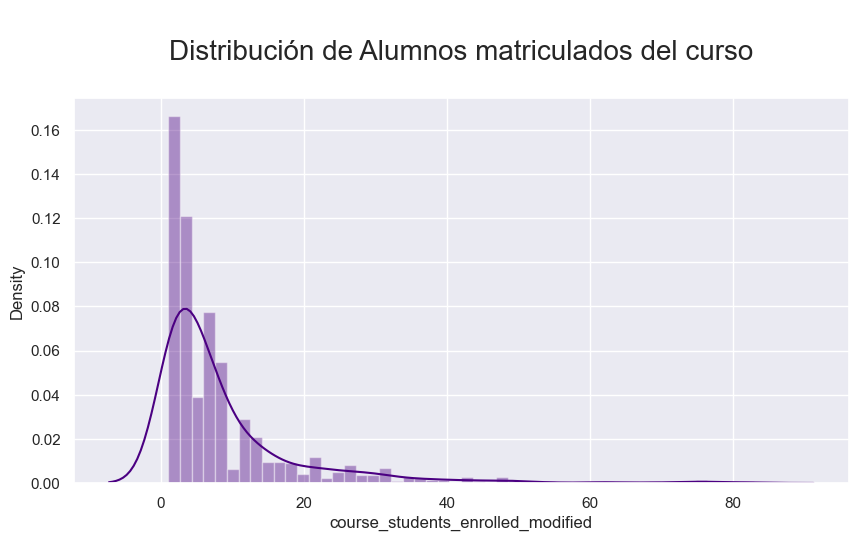

In [127]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(df_fe1['course_students_enrolled_modified'],color='indigo')
p.axes.set_title("\nDistribución de Alumnos matriculados del curso\n",fontsize=20)

so , most of the frequencies are in between 0-10, so, using average-1; so avoid the effect of outliers.

In [128]:
df_fe1['course_students_enrolled_modified'].fillna((df_fe1['course_students_enrolled_modified'].mean()-1), inplace=True)
df_fe1[['course_difficulty_modified','course_students_enrolled_modified']].describe()

,course_difficulty_modified,course_students_enrolled_modified
count,891.000000,891.000000
mean,0.369809,8.500695
std,0.472738,10.671816
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,5.000000
75%,0.500000,9.000000
max,2.000000,83.000000


In [129]:
df_numaric=df_fe1.select_dtypes(include=np.number)

🛠 9. Corelation Analysis

9.1. Encontrar relación entre columnas

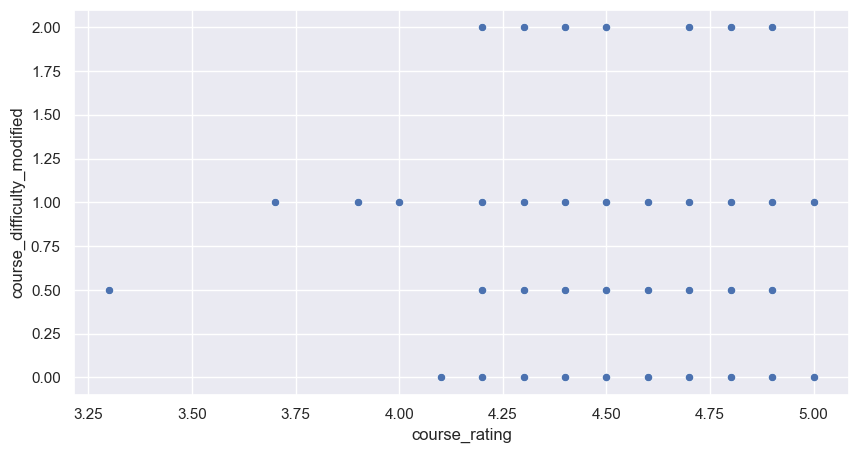

In [130]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.scatterplot( x='course_rating', y='course_difficulty_modified', data=df_numaric,palette="crest")

Findings :
Sin coorelación efectiva.

In [131]:
g_uni=df_fe1.groupby("course_organization")["course_students_enrolled_modified",'course_rating'].agg({"course_students_enrolled_modified":'size',"course_students_enrolled_modified":'mean','course_rating':'mean'}).reset_index()

In [132]:
g_uni_2=df_fe1.groupby("course_organization")["course_students_enrolled_modified"].agg({'size'}).reset_index()
g_uni['size']=g_uni_2['size']
g_uni_final=g_uni[g_uni_2['size']> 10]
g_uni_final.sort_values(by=["course_students_enrolled_modified","course_rating"],ascending=False);

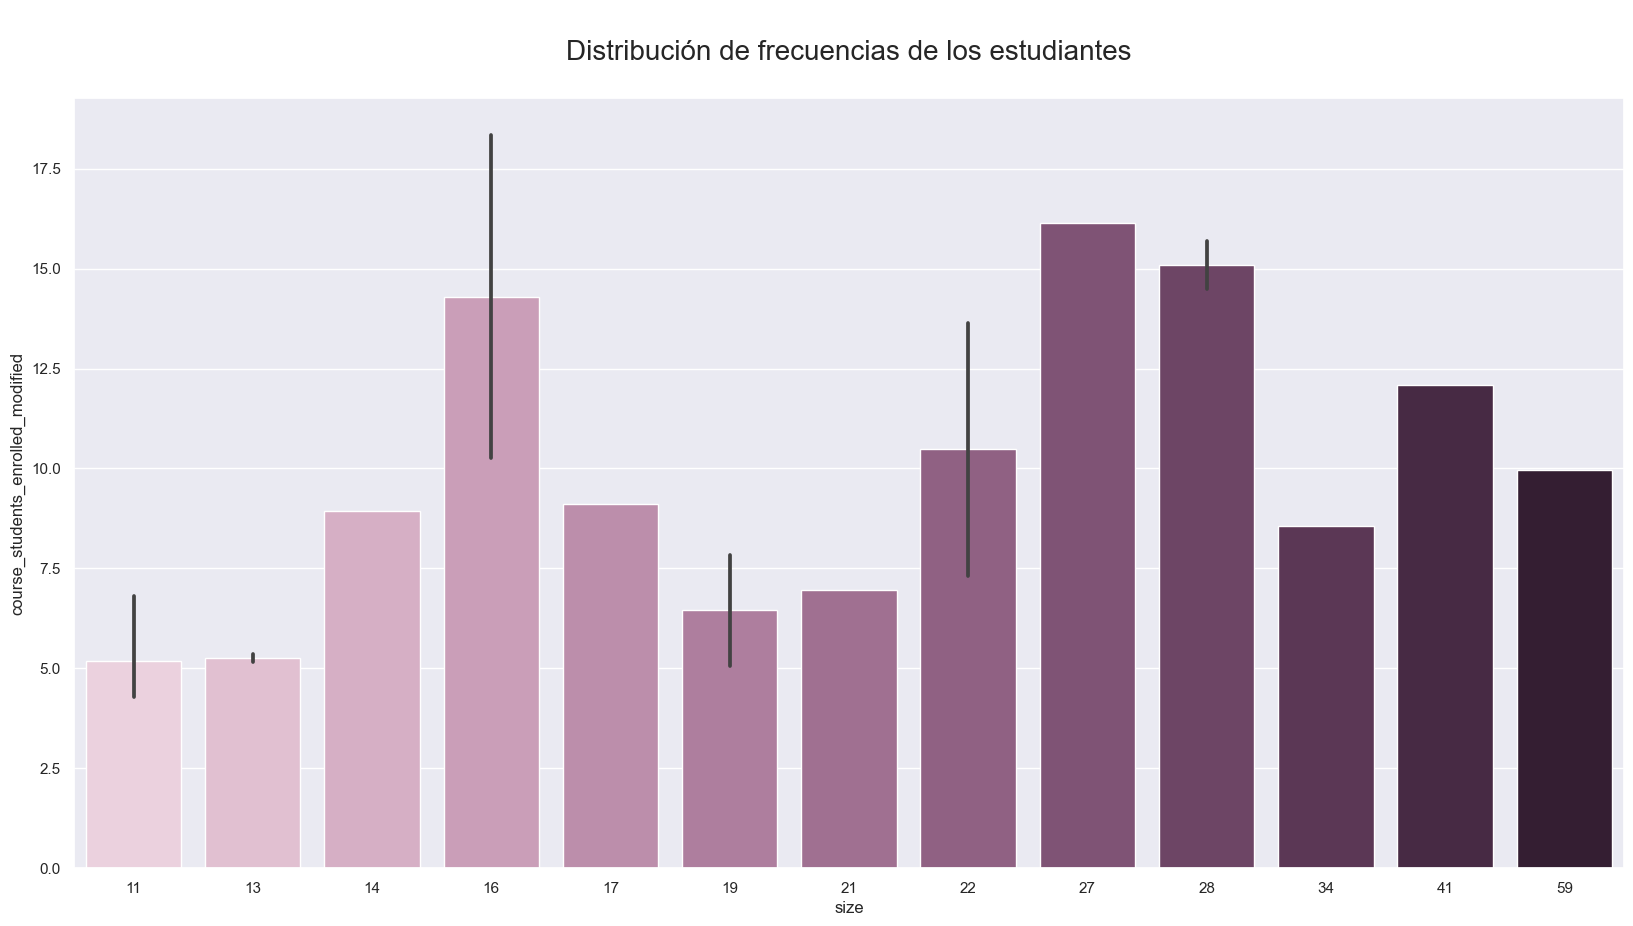

In [133]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="size", y="course_students_enrolled_modified", data=g_uni_final,palette="ch:s=.4,r=.1")
ax.axes.set_title("\nDistribución de frecuencias de los estudiantes\n",fontsize=20);

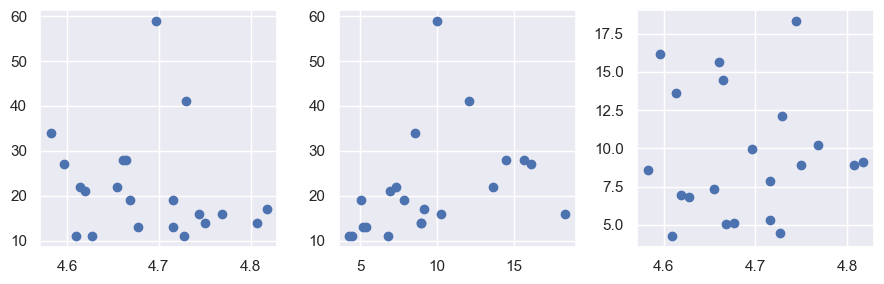

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
axes[0].scatter(g_uni_final["course_rating"], g_uni_final['size'])
axes[1].scatter(g_uni_final["course_students_enrolled_modified"], g_uni_final['size'])
axes[2].scatter(g_uni_final["course_rating"], g_uni_final["course_students_enrolled_modified"])
fig.tight_layout()
plt.show()

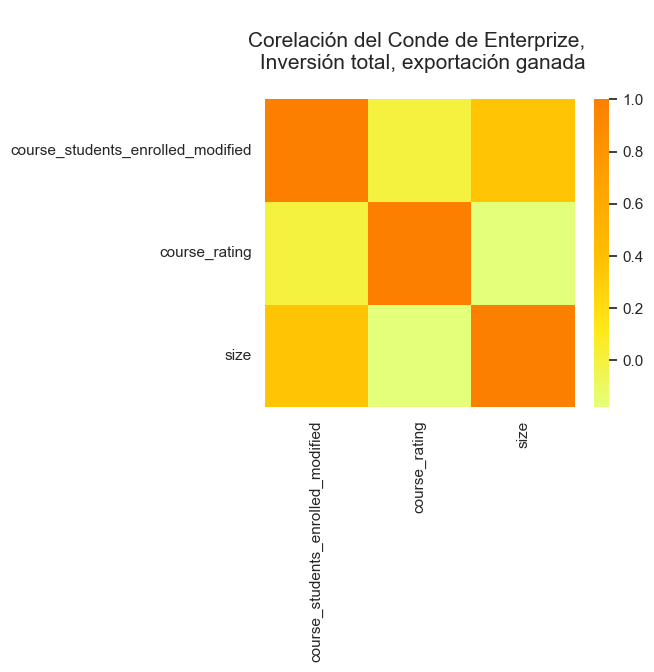

In [135]:
corrM = g_uni_final.corr()
sns.set(rc={'figure.figsize':(5,4)})
p=sns.heatmap(corrM, 
        xticklabels=corrM.columns,
        yticklabels=corrM.columns,
        cmap="Wistia")
p=p.axes.set_title("\nCorelación del Conde de Enterprize, \n Inversión total, exportación ganada\n",fontsize=15)

Resultados
El número medio de estudiantes matriculados por universidad tiene alguna relación positiva con el número de cursos ofrecidos por la universidad. Cuantos más cursos se ofrecen, más estudiantes se matriculan en promedio.

📕 10. Proveedor de cursos mejor calificado

In [136]:
df['course_title']=df['course_title']

In [137]:
g_uni['overall_rating']=(g_uni['course_students_enrolled_modified']/g_uni['course_students_enrolled_modified'].max())*3+(g_uni['course_rating']/g_uni['course_rating'].max())*7
g_uni=g_uni.sort_values(by='overall_rating',ascending=False)

In [138]:
g_uni.overall_rating.describe().T

count    154.000000
mean       7.502501
std        0.647127
min        6.403727
25%        7.118012
50%        7.317288
75%        7.886720
max        9.857143
Name: overall_rating, dtype: float64

In [139]:
g_unix=g_uni[g_uni['overall_rating']>=8.5]
g_unix

,course_organization,course_students_enrolled_modified,course_rating,size,overall_rating
58,McMaster University,23.000000,4.800000,1,9.857143
33,Google - Spectrum Sharing,21.000000,4.900000,1,9.739130
151,École Polytechnique,19.000000,4.800000,1,9.335404
52,Ludwig-Maximilians-Universität München (LMU),19.000000,4.750000,2,9.263975
150,deeplearning.ai,18.344495,4.743750,16,9.169546
30,Georgia Institute of Technology,17.700000,4.660000,10,8.965839
142,University of Washington,16.600000,4.660000,5,8.822360
48,Johns Hopkins University,15.678571,4.660714,28,8.703194
123,"University of California, Irvine",16.148148,4.596296,27,8.672418
79,SAS,13.666667,4.766667,3,8.592133


Text(0.5, 1.0, '\nLos mejores proveedores de cursos\n\n')

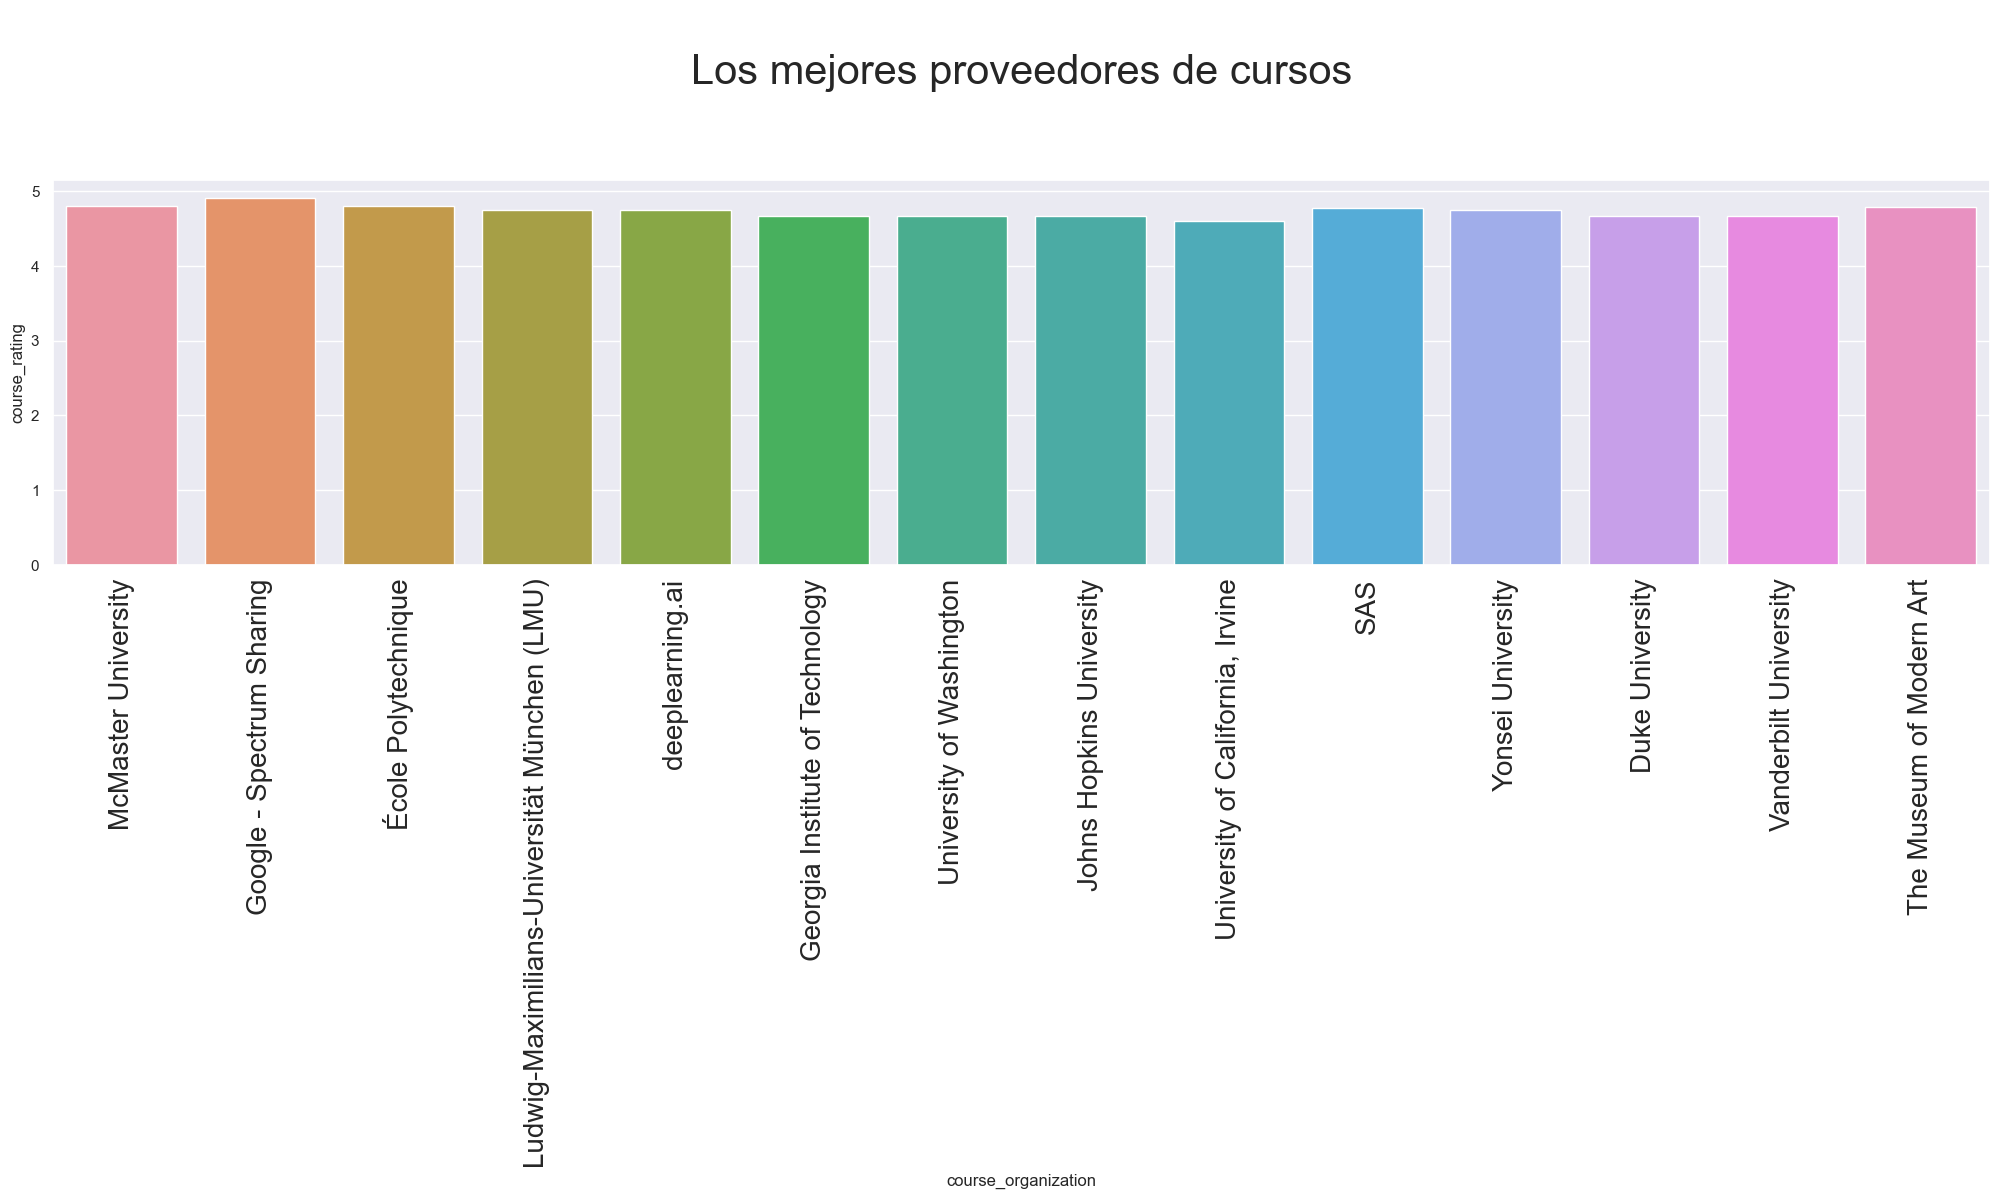

In [140]:
sns.set(rc={'figure.figsize':(25,5)})
plt.xticks(fontsize=20,rotation='vertical')
p=sns.barplot(x='course_organization',y="course_rating",data=g_unix,hue_order=g_uni['overall_rating'])
p.axes.set_title("\nLos mejores proveedores de cursos\n\n",fontsize=30)

📑 11. Importación de opiniones

11.1. Importación de opiniones

In [141]:
r=pd.read_csv('Coursera_reviews.csv')
r.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


11.2. Importando Librerias Necesarias

In [142]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import cufflinks as cf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


11.3. Generación de Wordcloud

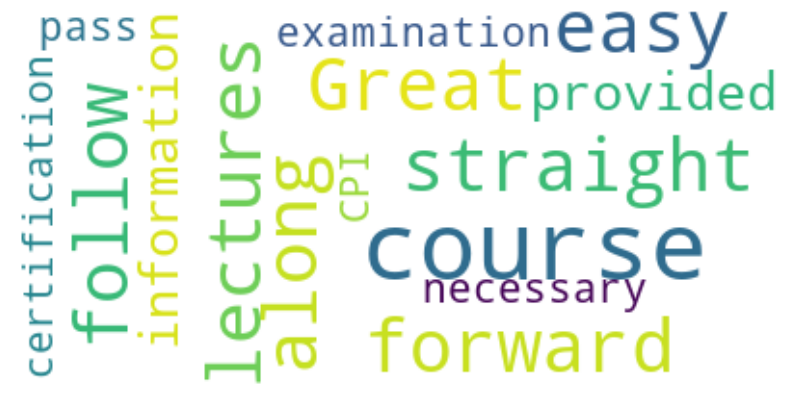

In [143]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(r.reviews[10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

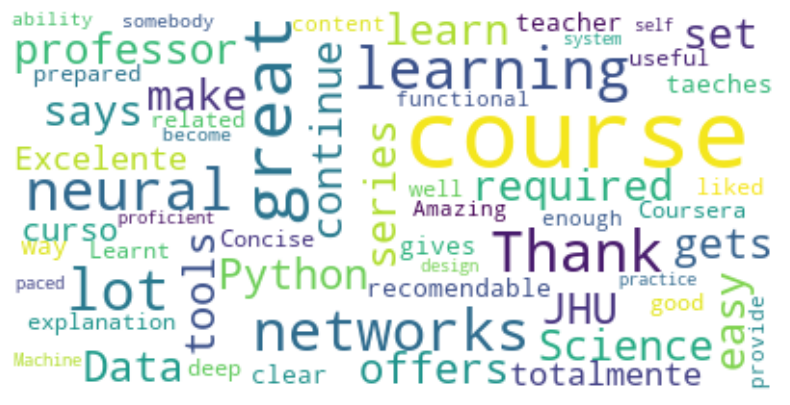

In [144]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(r.sample(10).reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

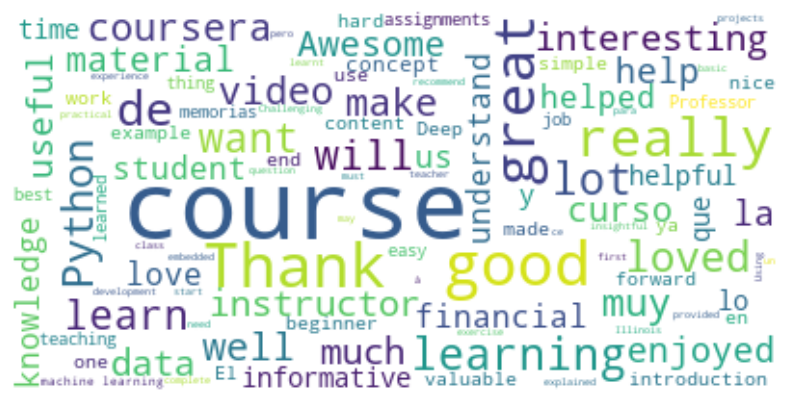

In [145]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(r.sample(100).reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

11.4. Generar sentimientos de revisión con Vader Sentiment

In [146]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [147]:
neg=[]
neu=[]
pos=[]
comp=[]
for review in r.reviews:
    scores=sentiment_analyzer_scores(str(review))
    neg.append(scores['neg'])
    pos.append(scores['pos'])
    neu.append(scores['neu'])
    comp.append(scores['compound'])

📒 12. Analisis de Opiniones

In [148]:
r['s_pos']=pos
r['s_neu']=neu
r['s_neg']=neg
r['s_comp']=comp

In [149]:
r.head()

,reviews,reviewers,date_reviews,rating,course_id,s_pos,s_neu,s_neg,s_comp
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,0.198,0.707,0.094,0.8504
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,0.056,0.944,0.000,0.4404
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,0.161,0.746,0.093,0.6572
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,0.175,0.743,0.081,0.4633
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,0.384,0.616,0.000,0.7823


In [150]:
for i in range(6,11):
    print ("----------------------------------------")
    print("Review : ",r['reviews'][i])
    print("Positivity:",r['s_pos'][i])
    print("Negativity:",r['s_neg'][i])
    print ("----------------------------------------")

----------------------------------------
Review :  Solid presentation all the way through. I really appreciated the intermittent questions that popped up to check on learning as well the regular (but not needless) quizzing. There was visuals such as charts / .ppt for those of us more visually inclined as well as a transcript below the video that followed along with the presentation!
Positivity: 0.135
Negativity: 0.0
----------------------------------------
----------------------------------------
Review :  Probably the best certification course I've taken in this respect. The course is planned out carefully, and I believe gave me everything I needed to ace my exam the first time around. The trainer for the majority of the course was awesome. She delivered the material in a great, professional mannor, but was never boring or monotoned. 
Positivity: 0.212
Negativity: 0.0
----------------------------------------
----------------------------------------
Review :  The ProctorU.com system to

12.1. Distribución de sentimientos

Text(0.5, 1.0, 'Opiniones Positivas')

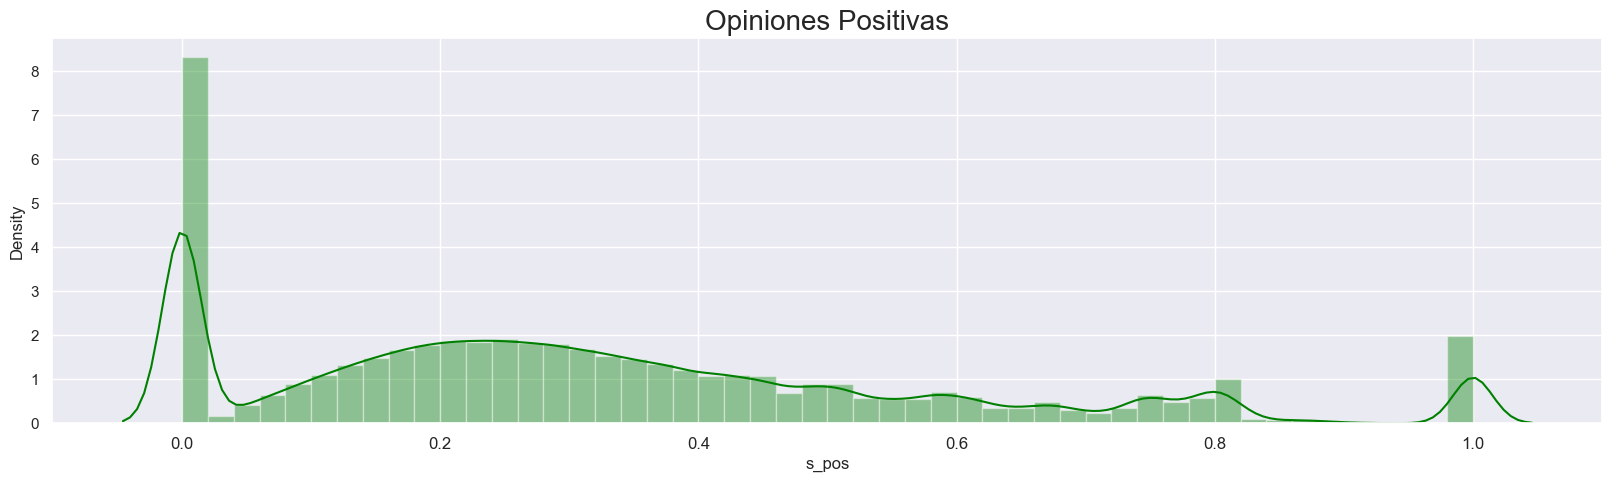

In [151]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_pos'],color='green')
p.axes.set_title("Opiniones Positivas",fontsize=20)

Text(0.5, 1.0, 'Opiniones negativas')

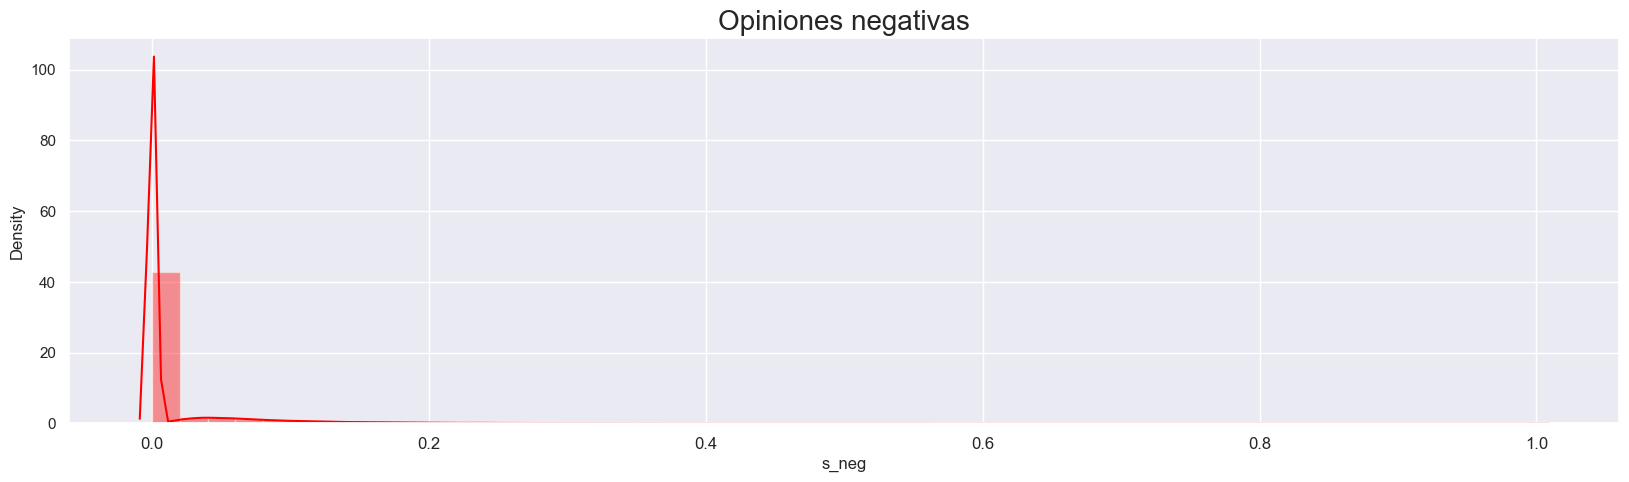

In [152]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_neg'],color='red')
p.axes.set_title("Opiniones negativas",fontsize=20)

Text(0.5, 1.0, 'Negative Reviews')

Text(0.5, 1.0, 'Opiniones neutrales')

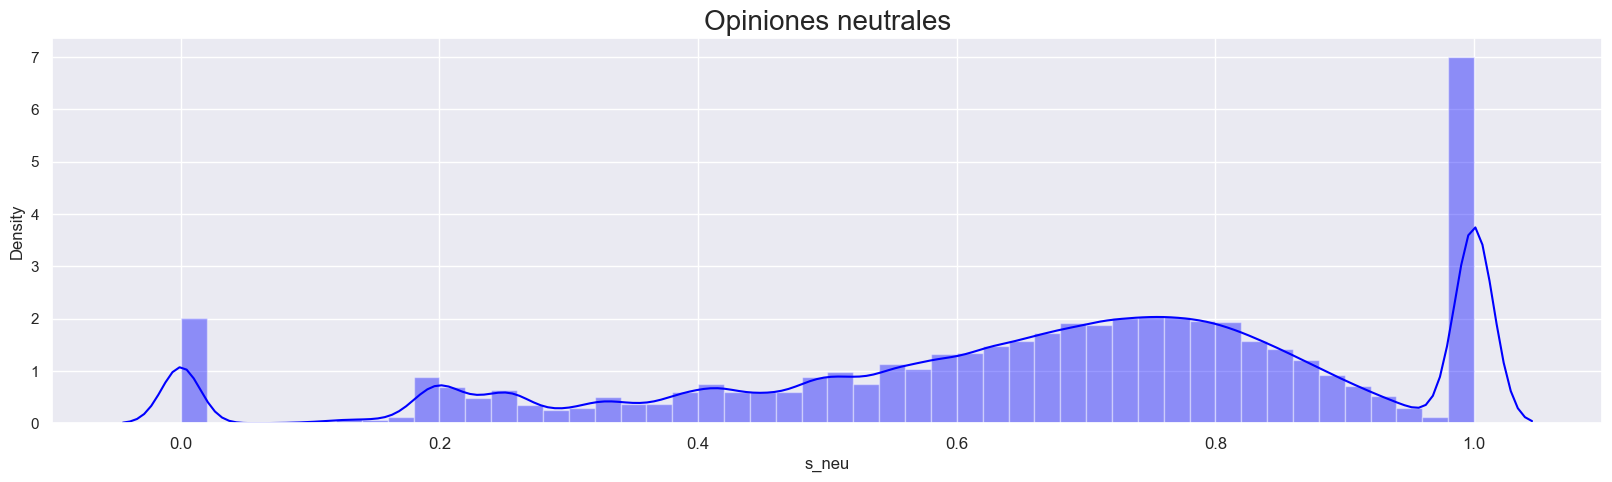

In [153]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_neu'],color='blue')
p.axes.set_title("Opiniones neutrales",fontsize=20)

Text(0.5, 1.0, 'Opiniones neutrales')

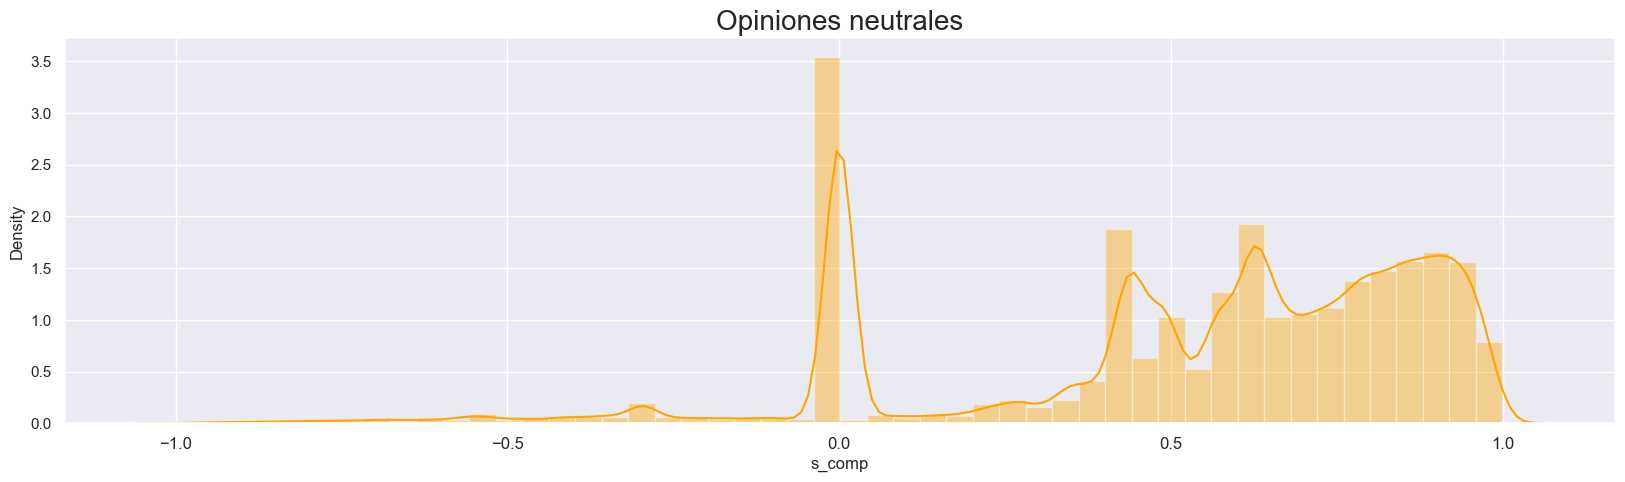

In [154]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_comp'],color='orange')
p.axes.set_title("Opiniones neutrales",fontsize=20)

12.2 Análisis sabio del curso (Giv3en Rating and Sentiment)

In [155]:
course_wise = r.groupby('course_id')['s_comp','rating'].mean()

In [185]:
course_wise['s_comp']=((course_wise['s_comp']*10)+10)/4
course_wise

,s_comp,rating
course_id,,
aboriginal-education,4.116898,4.604061
access-control-sscp,3.568584,4.572519
accounting-analytics,3.804213,4.426991
accounting-data-analytics-python,3.751625,3.500000
actualizacion-manejo-diabetes-tipo-2,2.417052,4.867052
...,...,...
womens-health-human-rights,4.141009,4.894231
write-a-feature-length-screenplay-for-film-or-television,4.090939,4.666667
write-your-first-novel,3.717000,3.942308


Text(0.5, 1.0, 'Puntajes reales y de sentimiento del curso')

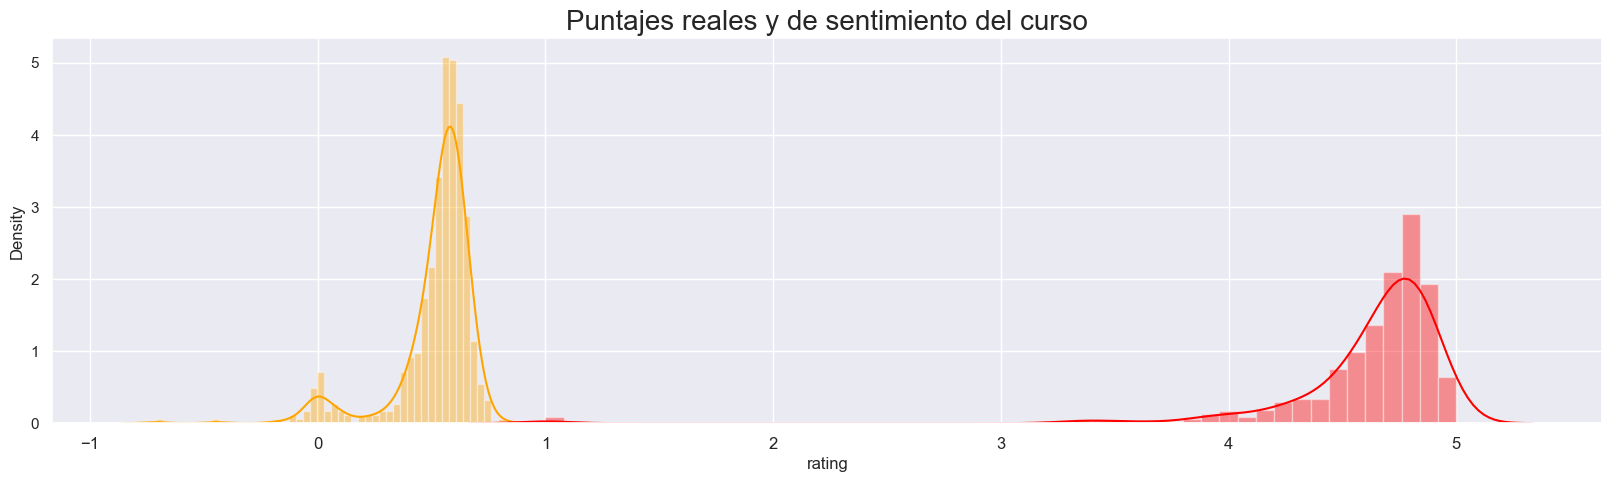

In [156]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(course_wise['s_comp'],color='orange')
p=sns.distplot(course_wise['rating'],color='red')
p.axes.set_title("Puntajes reales y de sentimiento del curso",fontsize=20)

Observaciones:
La calificación general dada es más alta que los puntajes de sentimiento.

12.3. Co-relation

Text(0.5, 1.0, 'Dada la corelación de calificación y calificación de sentimiento')

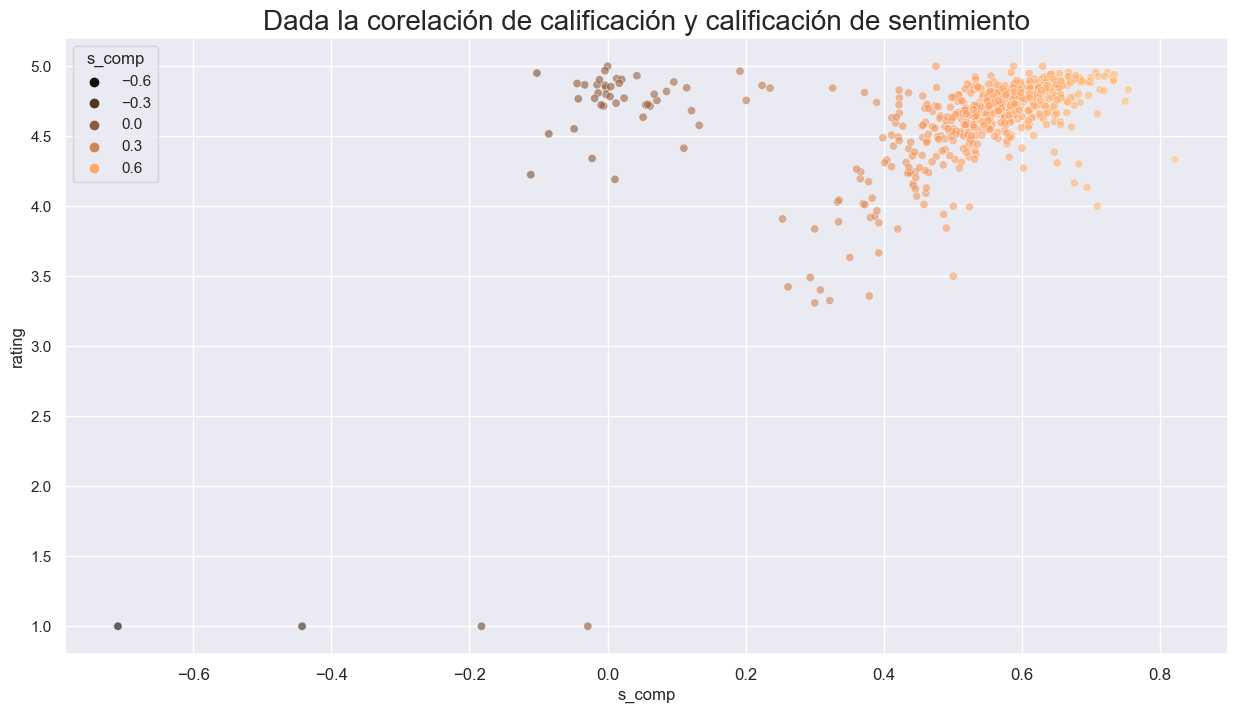

In [157]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xticks(fontsize=12)
p=sns.scatterplot(data=course_wise,x='s_comp',y='rating',palette='copper',hue='s_comp',alpha=0.6)
p.axes.set_title("Dada la corelación de calificación y calificación de sentimiento",fontsize=20)

Text(0.5, 1.0, 'Given rating and sentiment rating co-relation')

Observaciones
No hay relación c visible; pero 3 grupos!!! Interesante.
El cúmulo oscuro contiene la diferencia entre la calificación gven y la calificación de sentimiento de revisión.

📒 13. Key Findings and Insights

In [158]:
### La calificación promedio del curso es bastante más alta, en comparación con el valor más bajo y máximo. Por lo tanto, la calidad del curso se mantiene.
### La calificación de los cursos avanzados tiene algunos altibajos; tal vez debido a la baja frecuencia.
### El curso para principiantes tiene una distribución bastante similar a la tabla de calificación total, ya que gran parte de los datos provienen de ellos, y el número de cursos de nivel principiante es alto.
### La calificación máxima del curso intermedio no es tan aguda como la de otros, eso puede decir: como los participantes tienen algún conocimiento sobre el tema, pueden juzgar mejor y ser críticos.
### Las especializaciones tienen un valor medio más bajo que los cursos, pero la distribución es interesante. La especialización tiene buenos valores de distribución a la derecha, pero los cursos normales están a la izquierda.
### No hay coorelación efectiva entre course_difficulty,course_students_enrolled, calificación del curso.
### No hay una coorelación efectiva entre course_students_enrolled, calificación de cursos por universidad.
### El número medio de estudiantes matriculados por universidad tiene alguna relación positiva con el número de cursos ofrecidos por la universidad. Cuantos más cursos se ofrecen, más estudiantes se matriculan en promedio.